In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import glob 
import keras
import pathlib
import tensorflow as tf
import tensorflow_addons as tfa
import skimage.color as scc

from skimage import io
from random import randint
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ID
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
# from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

C:\Users\Sriya Nukala\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Sriya Nukala\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.14.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want t

In [139]:
conda install keras

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Sriya



In [134]:
pip install np_utils

     ---------------------------------------- 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56454 sha256=93e3ed86a17c61397616d22db8edebcb7a0d1e901588f9333a9a250742ef5c5e
  Stored in directory: c:\users\sriya nukala\appdata\local\pip\cache\wheels\c9\5e\52\216e2fa9b02d46b865d8160e7fe29dcf98f89a2fb7be254877
Successfully built np_utils
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow

     -------------------------------------- 284.1/284.1 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
     ------------------------------------- 182.0/182.0 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 151.

In [1]:
pip install tensorflow_addons

     -------------------------------------- 719.8/719.8 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset_path = r'C:\Users\Sriya Nukala\Downloads\Dataset\gaussian_filtered_images'
filepaths=[]
labels=[]

In [4]:
folds = os.listdir(dataset_path)

In [5]:
folds

['export.pkl', 'Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [6]:
for fold in folds:
    foldpath = os.path.join(dataset_path, fold)  
    # skip export.pkl file
    if pathlib.Path(foldpath).suffix == '':
        filelist = os.listdir(foldpath)

        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

In [7]:
img_paths = pd.Series(filepaths, name= 'filepaths')
img_labels = pd.Series(labels, name='labels')
dataset = pd.concat([img_paths, img_labels], axis= 1)

In [8]:
dataset

,filepaths,labels
0,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Mild
1,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Mild
2,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Mild
3,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Mild
4,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Mild
...,...,...
3657,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Severe
3658,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Severe
3659,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Severe
3660,C:\Users\Sriya Nukala\Downloads\Dataset\gaussi...,Severe


In [9]:
batch_size=3662
img=224
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

gen=ID()
data_gen = gen.flow_from_dataframe( dataset,x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)


Found 3662 validated image filenames belonging to 5 classes.


In [10]:
img_data, img_labels = data_gen.next()

In [11]:
print(img_data.shape, img_labels.shape)

(3662, 224, 224, 3) (3662, 5)


In [12]:
img_labels

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(img_data, img_labels, test_size = 0.25, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [14]:
sm = SMOTE(random_state=42)

train_data1, train_labels1 = sm.fit_resample(train_data.reshape(-1, img * img * 3), train_labels)

train_data2 = train_data1.reshape(-1, img, img, 3)

print(train_data2.shape, train_labels1.shape)

(5595, 224, 224, 3) (5595, 5)


In [15]:
test_data1, test_labels1 = sm.fit_resample(test_data.reshape(-1, img * img * 3), test_labels)

test_data2 = test_data1.reshape(-1, img, img, 3)

print(test_data2.shape, test_labels1.shape)

(2160, 224, 224, 3) (2160, 5)


In [16]:
val_data1, val_labels1 = sm.fit_resample(val_data.reshape(-1, img * img * 3), val_labels)

val_data2 = val_data1.reshape(-1, img, img, 3)

print(val_data2.shape, val_labels1.shape)

(1270, 224, 224, 3) (1270, 5)


In [17]:
train_data1.shape

(5595, 150528)

In [18]:
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

In [19]:
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(16, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(5, activation= 'softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 16)                24592     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 10814356 (41.25 MB)
Trainable params: 1072

In [21]:
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [23]:
history = model.fit(train_data,train_labels, epochs= 20, verbose= 1, validation_data= (val_data,val_labels), 
                    validation_steps= None, shuffle= False,batch_size=50)

Epoch 1/20
44/44 [==============================] - 490s 11s/step - loss: 1.3497 - accuracy: 0.7168 - val_loss: 1.7568 - val_accuracy: 0.6436
Epoch 2/20
44/44 [==============================] - 485s 11s/step - loss: 1.1795 - accuracy: 0.7550 - val_loss: 1.6531 - val_accuracy: 0.6364
Epoch 3/20
44/44 [==============================] - 487s 11s/step - loss: 1.0402 - accuracy: 0.8128 - val_loss: 1.4057 - val_accuracy: 0.7400
Epoch 4/20
44/44 [==============================] - 488s 11s/step - loss: 0.9533 - accuracy: 0.8333 - val_loss: 1.4244 - val_accuracy: 0.7545
Epoch 5/20
44/44 [==============================] - 515s 12s/step - loss: 0.8791 - accuracy: 0.8570 - val_loss: 1.3128 - val_accuracy: 0.7836
Epoch 6/20
44/44 [==============================] - 567s 13s/step - loss: 0.8234 - accuracy: 0.8716 - val_loss: 1.3195 - val_accuracy: 0.7873
Epoch 7/20
44/44 [==============================] - 565s 13s/step - loss: 0.7574 - accuracy: 0.8871 - val_loss: 1.3867 - val_accuracy: 0.7709
Epoch 

In [24]:
train_scores = model.evaluate(train_data, train_labels)
val_scores = model.evaluate(val_data, val_labels)
test_scores = model.evaluate(test_data,test_labels)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

29/29 [==============================] - 48s 2s/step - loss: 1.2875 - accuracy: 0.7740
Training Accuracy: 98.72%
Validation Accuracy: 78.00%
Testing Accuracy: 77.40%


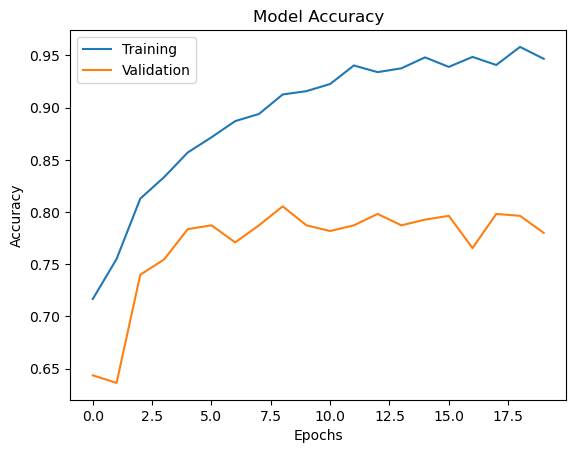

In [27]:
fig, ax = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model Accuracy_EfficientNetB3.png', format='png', dpi=300)

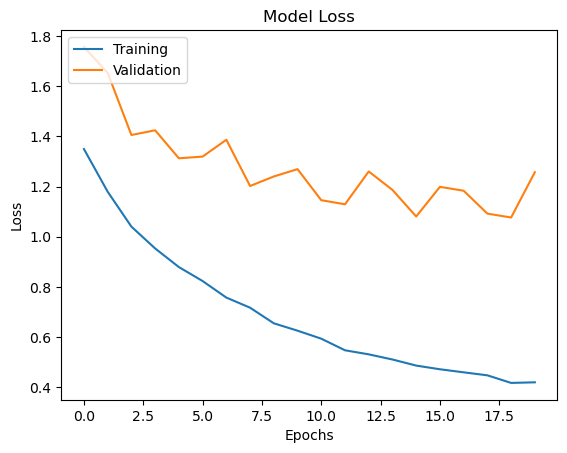

In [28]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model Loss_EfficientNetB3.png', format='png', dpi=300)

KeyError: 'AUC'

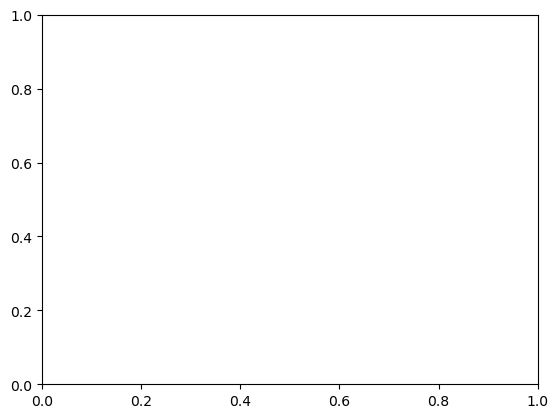

In [29]:
fig, ax = plt.subplots()
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
fig.savefig('Model AUC_EfficientNetB3.png', format='png', dpi=300)